In [189]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy import signal
import scipy

# (1)

a0: 0.7853981633974483


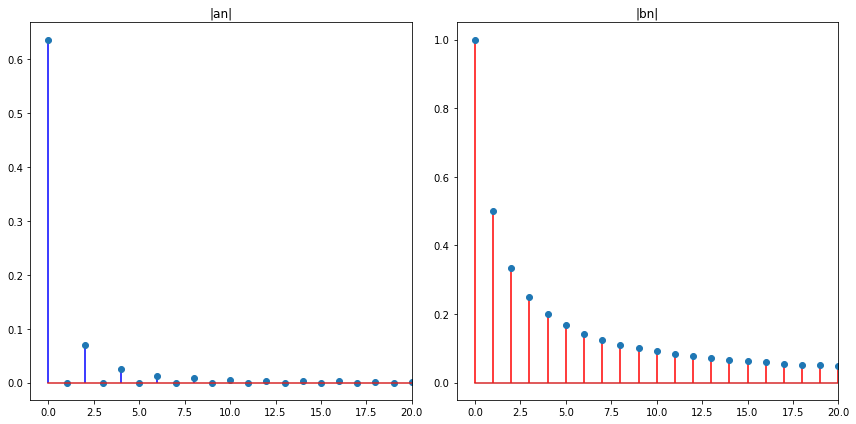

In [173]:
x=np.linspace(-2*np.pi,2*np.pi,100)

def f_1(x):
    return (np.pi-x) *(x>=0)*(x<=np.pi)

def fourier(li, lf, n, f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    A = np.zeros((n))
    # Sine coefficents
    B = np.zeros((n))
     
    for i in range(1,n+1):
        A[i-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/l* integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]

for_coef=fourier(-np.pi,np.pi,100,f_1)
a_n=for_coef[1]
b_n=for_coef[2]
 
print('a0:',for_coef[0])
n=np.arange(0,100,1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('|an|')
plt.xlim(-1,20)
plt.stem(n,abs(a_n),'b')

plt.subplot(1,2,2)
plt.title('|bn|')
plt.xlim(-1,20)
plt.stem(n,abs(b_n),'r')
plt.tight_layout()

# (2)

# (a)

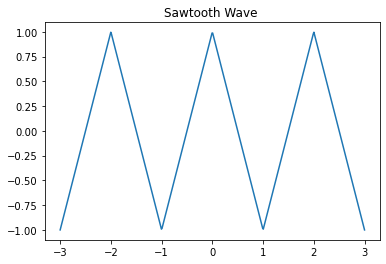

In [110]:
from scipy import signal

x=np.linspace(-3,3,500)
def saw(x):
    return signal.sawtooth(2*np.pi*0.5*(x+1),0.5)
plt.title('Sawtooth Wave ')
plt.plot(x,saw(x))

In [85]:
saw_four=fourier(-1,1,100,saw)

<ipython-input-83-9722ef1bf1c2>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  A[i-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]


a0: 5.7927149687978784e-18


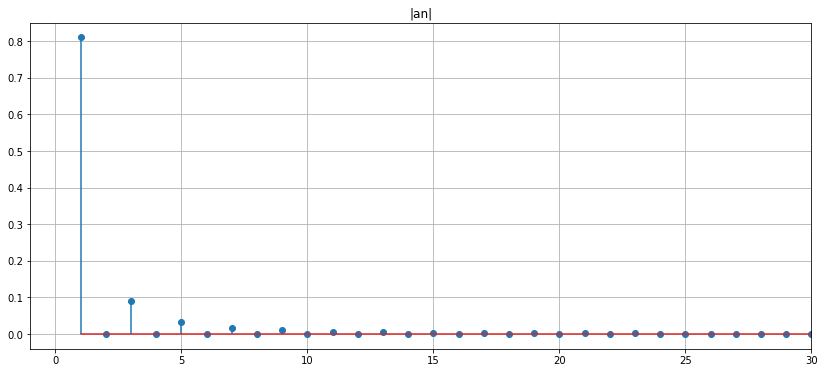

In [180]:
print('a0:',saw_four[0])
plt.figure(figsize=(14,6))
x_1=np.linspace(1,100,len(saw_four[1]))
plt.title('|an|')
plt.xlim(-1,30)
plt.stem(x_1,abs(saw_four[1]))
plt.grid()

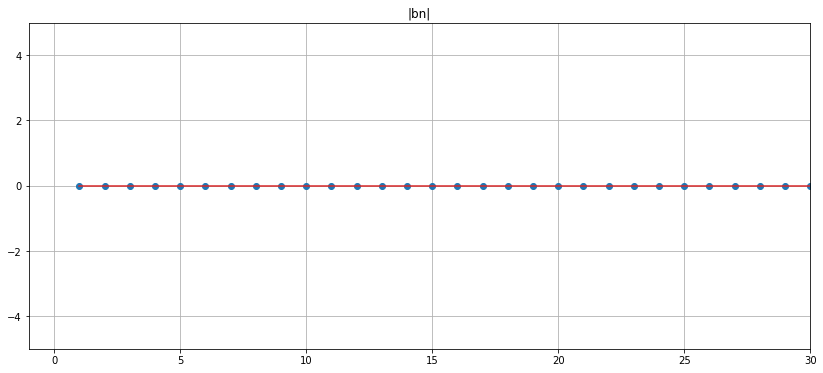

In [179]:
plt.figure(figsize=(14,6))
x_2=np.linspace(1,100,len(saw_four[2]))
plt.title('|bn|')
plt.ylim(-5,5)
plt.xlim(-1,30)
plt.stem(x_2,abs(saw_four[2]))
plt.grid()

# (b)

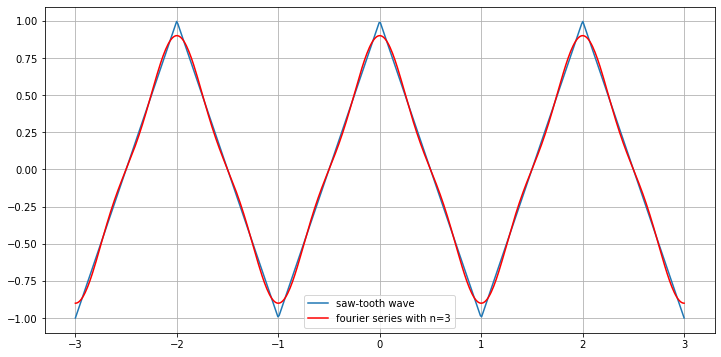

In [170]:
def fourierSeries(coeffs,x,l,n):
    sum = coeffs[0]
    for i in range(1,n+1):
        sum +=  coeffs[1][i-1]*np.cos(i*np.pi*x/l) +  coeffs[2][i-1]*np.sin(i*np.pi*x/l)
    return sum
     
f=fourierSeries(saw_four,x,1,3)
plt.figure(figsize=(12,6))
plt.plot(x,saw(x),label='saw-tooth wave')
plt.plot(x,f,'r',label='fourier series with n=3')
plt.legend(loc='best')
plt.grid()

# (c)

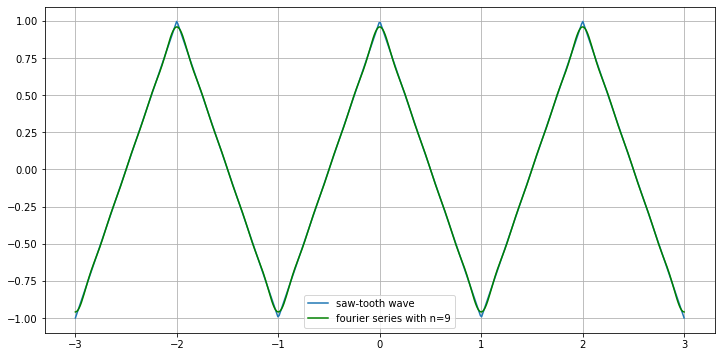

In [171]:
plt.figure(figsize=(12,6))
f_1=fourierSeries(saw_four,x,1,9)
plt.plot(x,saw(x),label='saw-tooth wave')
plt.plot(x,f_1,'g',label='fourier series with n=9')
plt.legend(loc='best')
plt.grid()

# (3)

In [97]:
def cft(g, f):
      
    result = np.zeros(len(f), dtype=complex)
    
    # Loop over all frequencies and calculate integral value
    for i, ff in enumerate(f):
        # Evaluate the Fourier Integral for a single frequency ff, 
    
        result[i] = complex_quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -10, 10)
    return result

def complex_quad(g, a, b):
    #Return definite integral of complex-valued g from a to b, 
    #using Simpson's rule
    # 2500: Amount of used samples for the trapezoidal rule
    t = np.linspace(a, b, 2500)  
    x = g(t)
    return integrate.simps(y=x, x=t)



# (a)

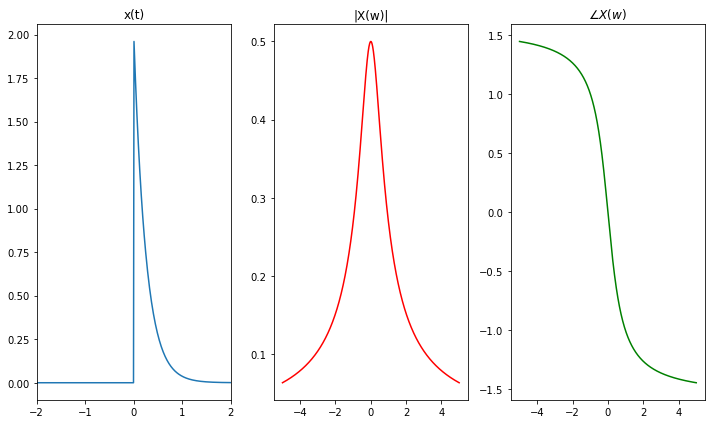

In [98]:
t=np.linspace(-5,5,1000)

def x(t):
    return 2*np.exp(-4*t) *(t>=0)

plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('x(t)')
plt.plot(t,x(t))
plt.xlim(-2,2)


t = np.linspace(-5, 5, 1000)
R = cft(x, t)  # Calculate the numeric Fourier Transform 

plt.subplot(1,3,2)
plt.title('|X(w)|')
plt.plot(t, abs(R),'r')

plt.subplot(1,3,3)
plt.title(r'$ \angle X(w)$')
plt.plot(t, np.angle(R),'g')
plt.tight_layout()

# (b)

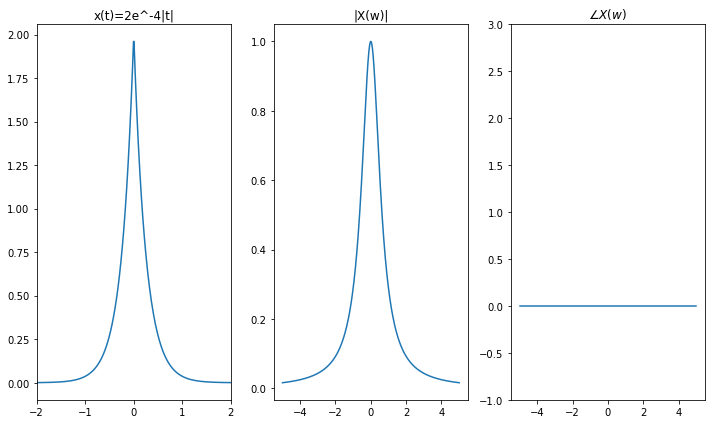

In [162]:
t=np.linspace(-5,5,1000)
def x_1(t):
    return 2*np.exp(-4*abs(t))

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title('x(t)=2e^-4|t|')
plt.plot(t,x_1(t))
plt.xlim(-2,2)

R_1=cft(x_1,t)

plt.subplot(132)
plt.title('|X(w)|')
plt.plot(t,abs(R_1))

plt.subplot(133)
plt.title(r'$ \angle X(w)$')
plt.plot(t,np.angle(R_1))
plt.ylim(-1,3)
plt.tight_layout()

# (4)

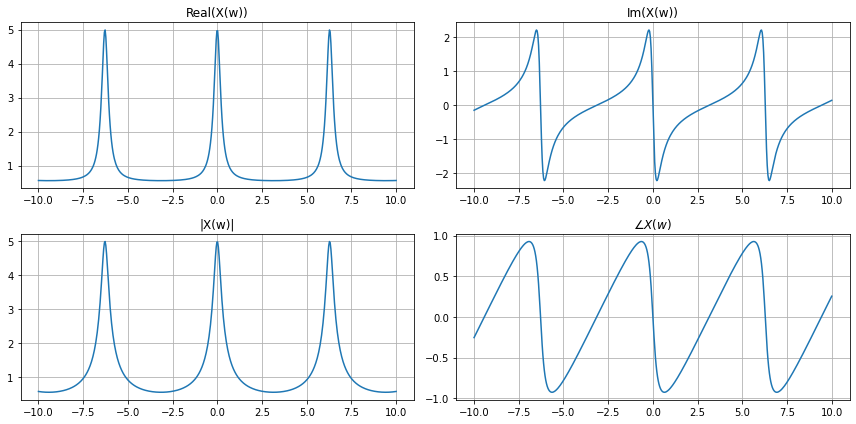

In [182]:
w=np.linspace(-10,10,500)
def x(w):
    return 1/(1-0.8*np.exp((-1j)*w))
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title('Real(X(w))')
plt.plot(w,np.real(x(w)))
plt.grid()

plt.subplot(2,2,2)
plt.title('Im(X(w))')
plt.plot(w,np.imag(x(w)))
plt.grid()

plt.subplot(2,2,3)
plt.title('|X(w)|')
plt.plot(w,abs(x(w)))
plt.grid()

plt.subplot(2,2,4)
plt.title(r'$ \angle X(w)$')
plt.plot(w,np.angle(x(w)))
plt.grid()
plt.tight_layout()

# (5)

<ipython-input-165-f09da0a23c3d>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  output[k] = s


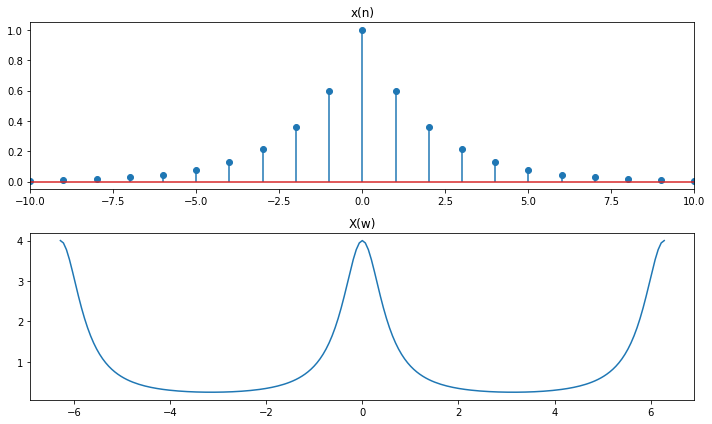

In [165]:
n=np.linspace(-100,100,201)
def x(n):
    return 0.6**(abs(n))


plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.title('x(n)')
plt.stem(n,x(n))
plt.xlim(-10,10)

def dtft(f,pt):
    output = np.zeros(len(n))
    for k in range(len(n)):  
        s = 0
        for t in range(len(n)): 
            s += f[t] * np.exp(-1j * pt[k] * t)
        output[k] = s
    return output

w=np.linspace(-2*np.pi,2*np.pi,201)
dt=dtft(x(n),w)

plt.subplot(2,1,2)
plt.title('X(w)')
plt.plot(w,dt)
plt.tight_layout()

# (6)

# (a)

<StemContainer object of 3 artists>

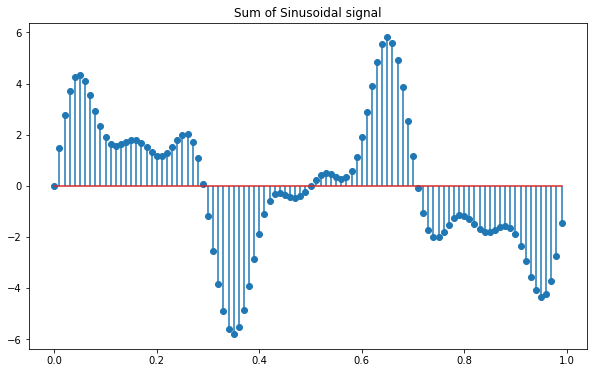

In [152]:
t=np.linspace(-5,5,1000)

fs=100
Ts=1/fs
n=np.arange(0,1/Ts)

x_1=3*np.sin(2*np.pi*2*t)
x_2=2*np.sin(2*np.pi*5*t)
x_3=np.sin(2*np.pi*8*t)

s=3*np.sin(2*np.pi*2*n*Ts)+2*np.sin(2*np.pi*5*n*Ts)+np.sin(2*np.pi*8*n*Ts)

plt.figure(figsize=(10,6))
plt.title('Sum of Sinusoidal signal')
plt.stem(n*Ts,s)

# (b)

In [36]:
def DFT(Xn,N):     #defining the DFT
    result=[]      
    for k in range (N):
        p=0
        for i in range(N):
            p=p+Xn[i]*np.exp((-2j*(np.pi)/N)*k*i)
        result.append(p)
    return result

Text(0.5, 0, 'frequency')

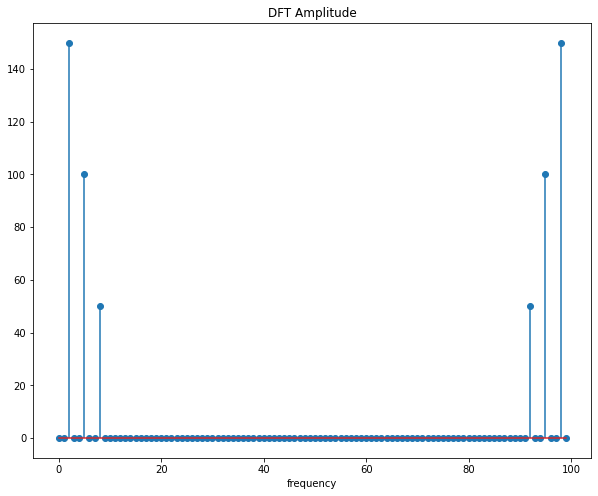

In [38]:
plt.figure(figsize=(10,8))
plt.title('DFT Amplitude')
S=DFT(s,len(s))
plt.stem(n,np.abs(S))
plt.xlabel('frequency')

# (c)

Text(0, 0.5, 'DFT Amplitude')

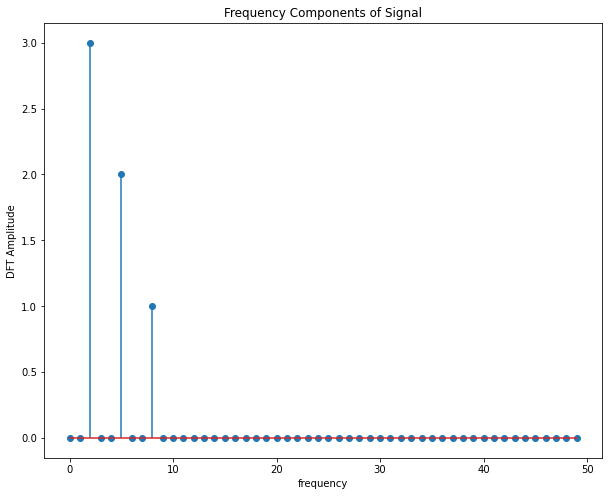

In [128]:
n_1=int(len(S)/2)
plt.figure(figsize=(10,8))
plt.title('Frequency Components of Signal')
plt.stem(n[0:n_1],np.abs(S)[0:n_1]/n_1)
plt.xlabel('frequency')
plt.ylabel('DFT Amplitude')

# (7)

# (a)

<StemContainer object of 3 artists>

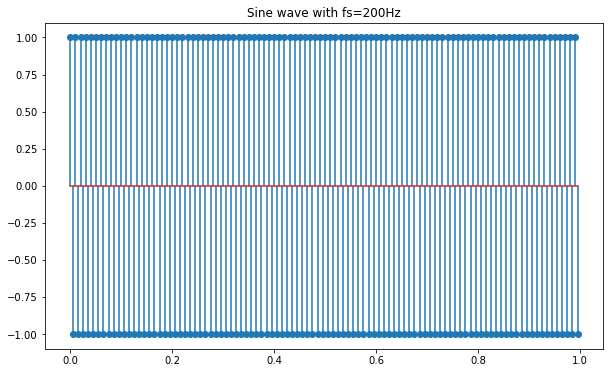

In [181]:
SR=200
ts=1/SR
t_1=np.arange(0,1,ts)

f_sin=np.sin(2*np.pi*100*t_1+np.pi/2)

plt.figure(figsize=(10,6))
plt.title('Sine wave with fs=200Hz')
plt.stem(t_1,f_sin)

# (b)

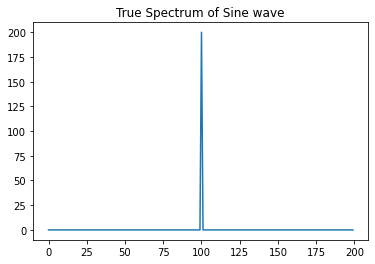

In [188]:
plt.title('True Spectrum of Sine wave')
plt.plot(np.real(np.fft.fft(f_sin)))


# (c)

In [26]:
win_1=signal.windows.boxcar(80)
win_2=signal.windows.boxcar(160)


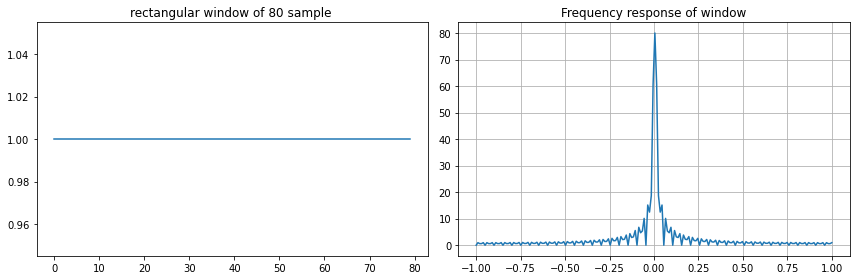

In [161]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].plot(win_1)
axes[0].set_title('rectangular window of 80 sample ')
a=scipy.fft.fft(win_1,200)
frequency=np.linspace(-1,1,len(a))
f_win1=np.abs(scipy.fft.fftshift(a))

axes[1].plot(frequency,f_win1)
axes[1].set_title('Frequency response of window')
plt.tight_layout()
plt.grid()

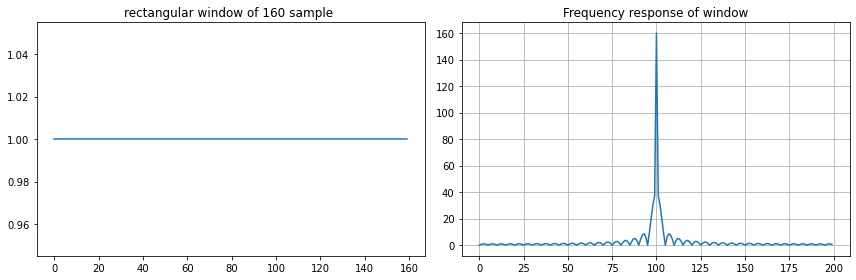

In [141]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].plot(win_2)
axes[0].set_title('rectangular window of 160 sample ')
b=scipy.fft.fft(win_2,200)
frequency=np.linspace(-1,1,len(b))
f_win2=np.abs(scipy.fft.fftshift(b))

axes[1].plot(f_win2)
axes[1].set_title('Frequency response of window')
plt.tight_layout()
plt.grid()